# Sobre o projeto

Conforme a descrição e README deste projeto, o objetivo é realizar uma exploração e modelagem de um modelo de Machine Learning conforme o material visto durante as aulas.

Neste grupo, escolhemos construir um **modelo de regressão** para prever a **qualidade** de vinhos com base em suas propriedades químicas - como acidez, pH, sulfatos, etc. 

# Coleta dos dados e setup

## Importações

Centralização das importações que serão utilizadas ao longo do arquivo em diversas etapas

In [1]:
# Análise
import pandas as pd
import numpy as np

# Visualização
import seaborn as sns
import matplotlib.pyplot as plt

# Pré-processamento
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Machine Learning - Modelos e métricas
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import RandomizedSearchCV

## Coleta dos dados

> **Importante:** Optamos por deixar os códigos desta seção comentados, já que os resultados estão presentes na pasta /data. Isso evita possíveis erros do site cair, o link estar quebrado, etc.

### Baixando os dados

Segundo o site da [UCI](https://archive.ics.uci.edu/), recomendam pegar os dados da seguinte forma:

In [2]:
# from ucimlrepo import fetch_ucirepo 
  
# # fetch dataset 
# wine_quality = fetch_ucirepo(id=186) 
  
# # data (as pandas dataframes) 
# X = wine_quality.data.features 
# y = wine_quality.data.targets 

Porém, ele mistura os datasets `winequality-white` e `winequality-red` sem colocar uma coluna indicando qual é o tipo - isso, futuramente, provavelmente irá atrapalhar a análise, pois são vinhos diferentes e na mesma base, sem separação.

O tamanho de `X` é o somatório de ambos os datasets, contendo 11 colunas de features - deveria ter uma 12°, indicando o se é white ou red.

In [3]:
# print(X.shape)
# X.head(2)

Por conta disso, optamos por baixar os datasets separadamente e juntá-los em um único arquivo, adicionando a coluna `'wine_type'`

In [4]:
# red = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
# white = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'

# wine_quality_red = pd.read_csv(red, sep=';')
# wine_quality_white = pd.read_csv(white, sep=';')

# display(wine_quality_red)
# display(wine_quality_white)

In [5]:
# wine_quality_red['wine_type'] = 'red'
# wine_quality_white['wine_type'] = 'white'

# wine_quality = pd.concat([wine_quality_red, wine_quality_white]).reset_index(drop=True)
# wine_quality

### Salvando os dados

In [6]:
import os

raw_data_folder = os.path.join('data', 'raw')

os.makedirs(raw_data_folder, exist_ok=True)

In [7]:
# filenames = {
#     "wine_quality": wine_quality,
#     "wine_quality_red": wine_quality_red,
#     "wine_quality_white": wine_quality_white,
# }

# for filename, df in filenames.items():
#     df.to_csv(os.path.join(raw_data_folder, f"{filename}.csv"), index=False)

## Importando os dados

Caso necessário durante alguma etapa, já decidimos salvar todos os dfs

In [8]:
wine_quality = pd.read_csv(os.path.join(raw_data_folder, 'wine_quality.csv'))
wine_quality

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [9]:
wine_quality_red = pd.read_csv(os.path.join(raw_data_folder, 'wine_quality_red.csv'))
wine_quality_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,red
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red


In [10]:
wine_quality_white = pd.read_csv(os.path.join(raw_data_folder, 'wine_quality_white.csv'))
wine_quality_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


# Desenvolvimento

## EDA (Exploratory Data Analysis) dos dados

Aqui os dados serão analisados de forma geral, ajudando a compreender melhor seus padrões e comportamento, além de quais tratamentos e/ou criações de novas colunas podem aparecer na etapa de pré-processamento.

### Sobre

In [11]:
wine_quality.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'wine_type'],
      dtype='object')

Segundo a referência de onde saiu o dataset, o [paper introdutório](https://repositorium.sdum.uminho.pt/bitstream/1822/10029/1/wine5.pdf), cada uma das colunas possui o significado abaixo:

| Coluna                 | Unidade                       | Descrição                                                                                 |
|------------------------|-------------------------------|-------------------------------------------------------------------------------------------|
| `fixed acidity`        | *g(tartaric acid)/L*       | Concentração de ácido tartárico, contribuindo para a acidez total do vinho                |
| `volatile acidity`     | *g(acetic acid)/L*         | Acidez volátil causada pelo ácido acético;  |
| `citric acid`          | *g/L*                      | Concentração de ácido cítrico, que pode dar frescor ao vinho                              |
| `residual sugar`       | *g/L*                      | Açúcar que resta após a fermentação; afeta o sabor e a doçura do vinho                    |
| `chlorides`            | *g(sodium chloride)/L*     | Concentração de cloreto de sódio; altos valores podem indicar sabor salgado               |
| `free sulfur dioxide`  | *mg/L*                     | Dióxido de enxofre livre; inibe micro-organismos e evita oxidação                         |
| `total sulfur dioxide` | *mg/L*                     | Soma de dióxido de enxofre livre e combinado; preserva o vinho                            |
| `density`              | *g/mL*                      | Densidade relativa do vinho; indica teor de álcool e concentração de açúcar               |
| `pH`                   | -                             | Medida da acidez do vinho; valores mais baixos indicam maior acidez                       |
| `sulphates`            | *g(potassium sulphate)/L*  | Concentração de sulfatos, contribuindo para a estabilidade microbiológica                 |
| `alcohol`              | *% vol.*                     | Percentual de álcool no vinho; afeta o corpo e a percepção de sabor                       |
| `quality`              | -                             | Nota de qualidade do vinho, em uma escala de 0 a 10                                       |
| `wine_type`            | -                             | Tipo do vinho, sendo `red` (tinto) ou `white` (branco)                                    |


### Informações gerais do dataset

In [12]:
print(f'{wine_quality.shape[0]} linhas e {wine_quality.shape[1]} colunas.')

6497 linhas e 13 colunas.


Todos os dados (exceto o `wine_type`, que definimos) são float ou int.

In [13]:
wine_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_type             6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


Também não temos valores nulos no dataset

In [14]:
wine_quality.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_type               0
dtype: int64

Temos valores duplicados, faz sentido já removê-los, pois podem acabar influenciando em outras análises.

In [15]:
len(wine_quality[wine_quality.duplicated()])

1177

In [16]:
wine_quality = wine_quality.drop_duplicates()
wine_quality

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


### Análise das variáveis

Caso fosse uma classificação do tipo do vinho, teríamos uma classificação desbalanceada, porém estamos tentando realizar uma regressão.

De qualquer forma, como temos mais amostras de vinho branco, talvez isso influencie como o algoritmo irá se comportar, já que muito provavelmente suas propriedades resultam em notas diferentes.

> Ex.: É provável que um vinho tinto e um vinho branco com as mesmas propriedades químicas terão notas diferentes, pois algumas características (como o percentual de álcool ou acidez) em um pode ser mais relevante do que no outro.

In [17]:
wine_quality.value_counts('wine_type').reset_index(name='count')

,wine_type,count
0,white,3961
1,red,1359


Por conta disso, seria interessante realizar outras análises levando o tipo do vinho em consideração.

Abaixo, conseguimos ver que existem casos onde os vinhos são de **diferentes tipos**, mas ainda **compartilham da mesma nota**.

Além disso, removendo também a coluna de notas (`quality`), podemos perceber que os dados continuam os mesmos, indicando que os vinhos, mesmo sendo de tipos diferentes, acabaram tendo uma mesma nota devido às suas propriedades químicas - isso já nos fornece um primeiro indício que o modelo pode funcionar bem, mesmo atuando em cima de tipos diferentes.

In [18]:
wine_quality[wine_quality.drop(columns=['wine_type', 'quality']).duplicated(keep=False)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
836,6.7,0.28,0.28,2.4,0.012,36.0,100.0,0.99064,3.26,0.39,11.7,7,red
1131,5.9,0.19,0.21,1.7,0.045,57.0,135.0,0.99341,3.32,0.44,9.5,5,red
4230,6.7,0.28,0.28,2.4,0.012,36.0,100.0,0.99064,3.26,0.39,11.7,7,white
4973,5.9,0.19,0.21,1.7,0.045,57.0,135.0,0.99341,3.32,0.44,9.5,5,white


Analisando as variáveis numéricas, já percebemos alguns tratamentos possíveis na fase de pré-processamento:
- Os dados possuem unidades e tipos diferentes (ml, L, g, inteiros como o `pH`, percentual como o `alcohol`)
- Olhando para as médias e máximos de cada coluna, percebe-se que um ajuste na escala é necessário
- A única variável com um valor zerado é a `citric acid` - algumas bases de dados gostam de preencher valores desconhecidos/nulos com 0, então é algo a ser investigado

In [19]:
wine_quality.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,7.215179,0.344130,0.318494,5.048477,0.056690,30.036654,114.109023,0.994535,3.224664,0.533357,10.549241,5.795677
std,1.319671,0.168248,0.147157,4.500180,0.036863,17.805045,56.774223,0.002966,0.160379,0.149743,1.185933,0.879772
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994650,3.210000,0.510000,10.400000,6.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.250000,0.996770,3.330000,0.600000,11.400000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


#### Análises gráficas

##### Histogramas

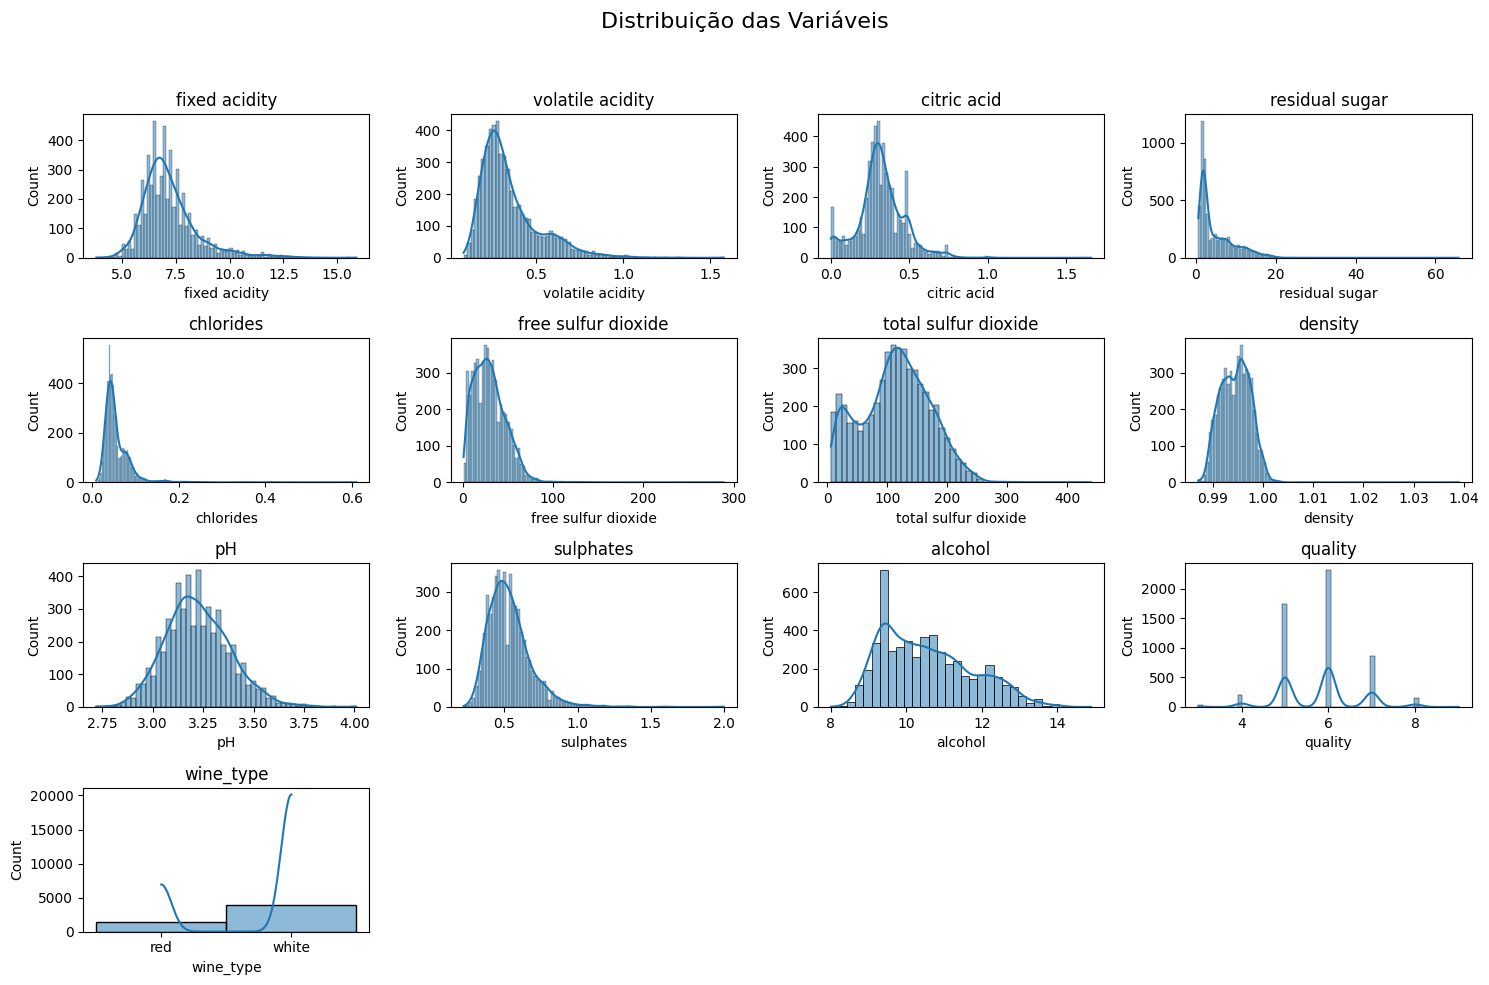

In [20]:
import math

num_vars = len(wine_quality.columns)

cols = 4
rows = math.ceil(num_vars / cols)

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 10))
fig.suptitle('Distribuição das Variáveis', fontsize=16)

for i, col in enumerate(wine_quality.columns):
    ax = axes[i // cols, i % cols]
    sns.histplot(wine_quality[col], kde=True, ax=ax)
    ax.set_title(col)

for j in range(i + 1, rows * cols):
    fig.delaxes(axes[j // cols, j % cols])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

##### Correlação

Como nossos dados são contínuos, a correlação mais apropriada é a de *Pearson*

Nas correlações abaixo, vemos que o impacto do álcool e densidade dos vinhos na nota final é alto, isso nos mostra que é uma variável importante para a análise final.

Também observamos que algumas características possuem um impacto maior na nota em um tipo de vinho do que outras. No vinho tinto, por exemplo, sua `citric acid` foi mais relevante do que para o vinho branco. Essa e outras correlações indicam diferenças nos tipos de vinho.

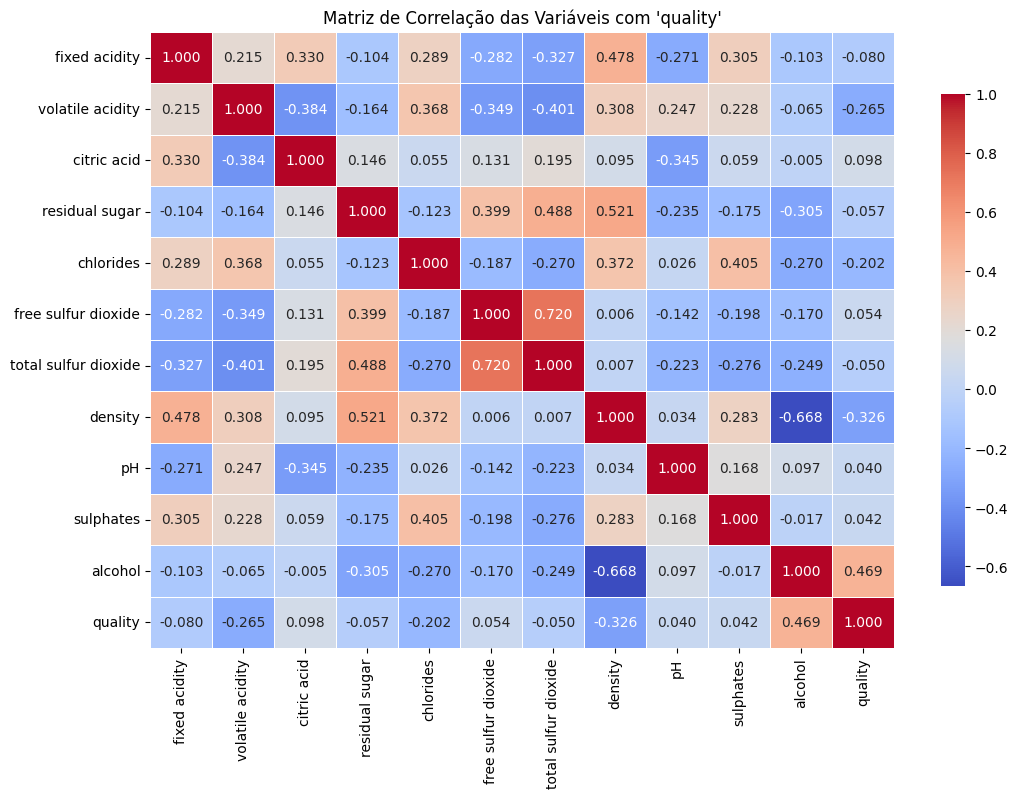

In [21]:
wine_quality_corr_df = wine_quality.drop(columns='wine_type')
correlation_matrix = wine_quality_corr_df.corr(method='pearson')

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f", linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title("Matriz de Correlação das Variáveis com 'quality'")
plt.show()

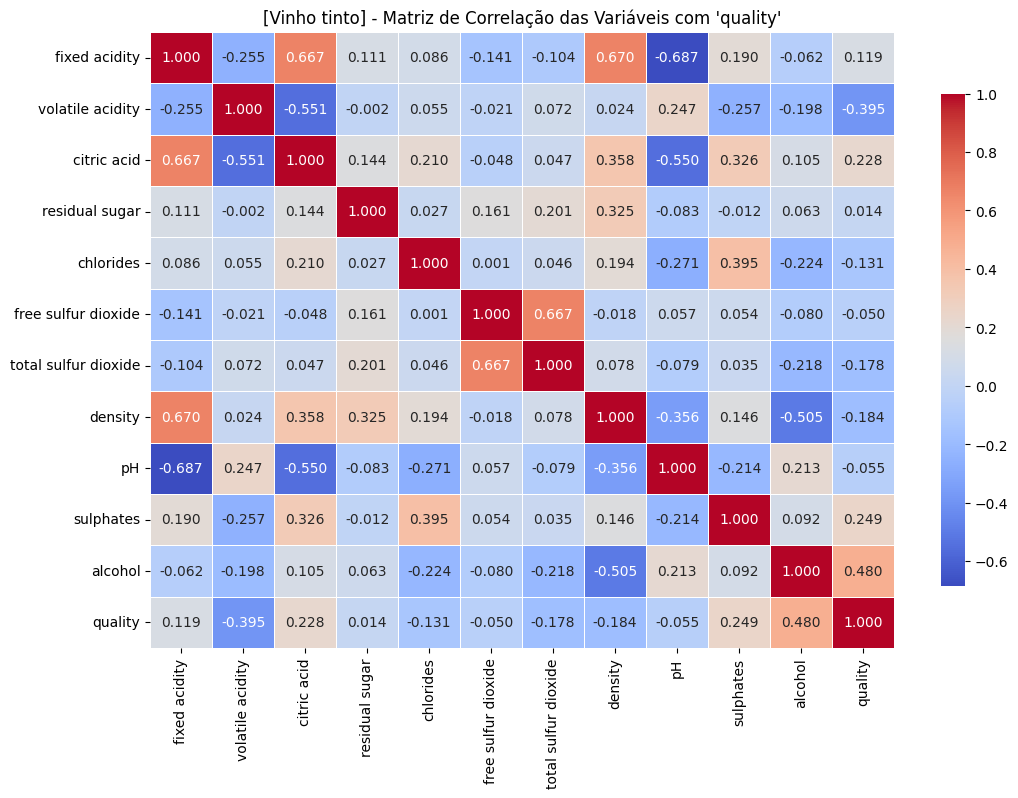

In [22]:
wine_quality_red_corr_df = wine_quality[wine_quality.wine_type == 'red'].drop(columns='wine_type')
correlation_matrix_red = wine_quality_red_corr_df.corr(method='pearson')

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_red, annot=True, cmap='coolwarm', fmt=".3f", linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title("[Vinho tinto] - Matriz de Correlação das Variáveis com 'quality'")
plt.show()

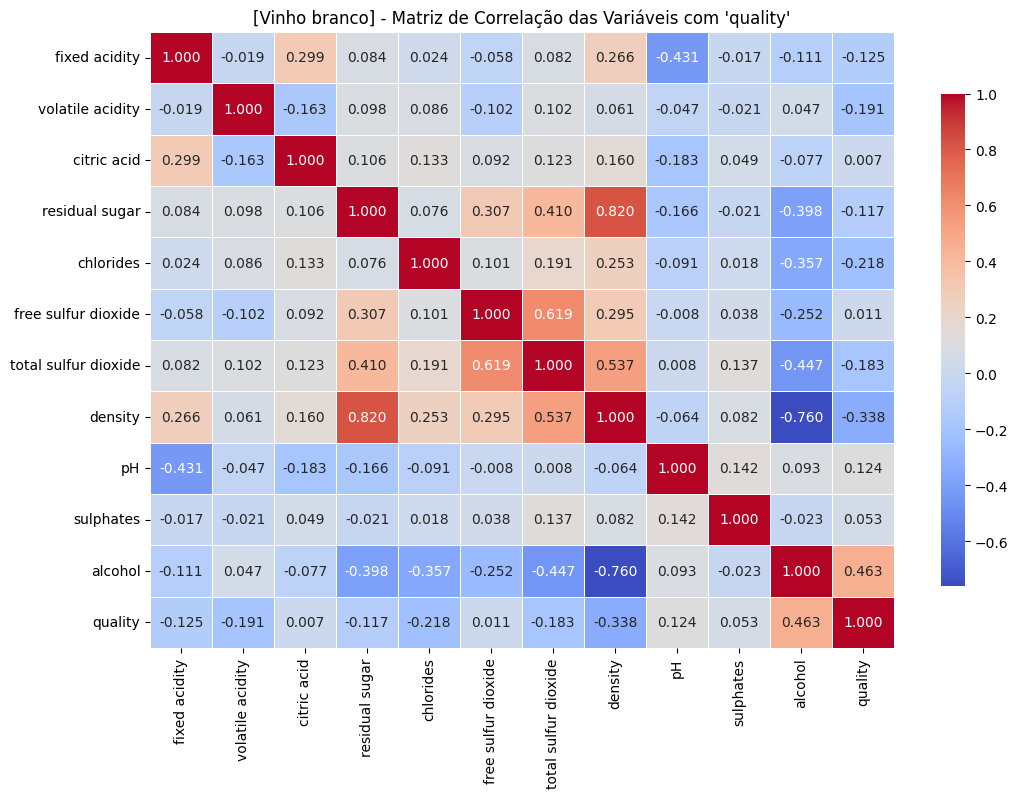

In [23]:
wine_quality_white_corr_df = wine_quality[wine_quality.wine_type == 'white'].drop(columns='wine_type')
correlation_matrix_white = wine_quality_white_corr_df.corr(method='pearson')

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_white, annot=True, cmap='coolwarm', fmt=".3f", linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title("[Vinho branco] - Matriz de Correlação das Variáveis com 'quality'")
plt.show()

##### Boxplots - verificando outliers e distribuição

In [24]:
wine_quality_bp_df = wine_quality_corr_df.drop(columns='quality')
most_pos_correlation = wine_quality_bp_df.corrwith(wine_quality_corr_df['quality']).nlargest(3).index
most_neg_correlation = wine_quality_bp_df.corrwith(wine_quality_corr_df['quality']).nsmallest(3).index

# apenas variáveis que tiveram uma correlação mais interessante com 'quality'
best_corr_columns = np.unique(most_pos_correlation.append(most_neg_correlation))
best_corr_columns

array(['alcohol', 'chlorides', 'citric acid', 'density',
       'free sulfur dioxide', 'volatile acidity'], dtype=object)

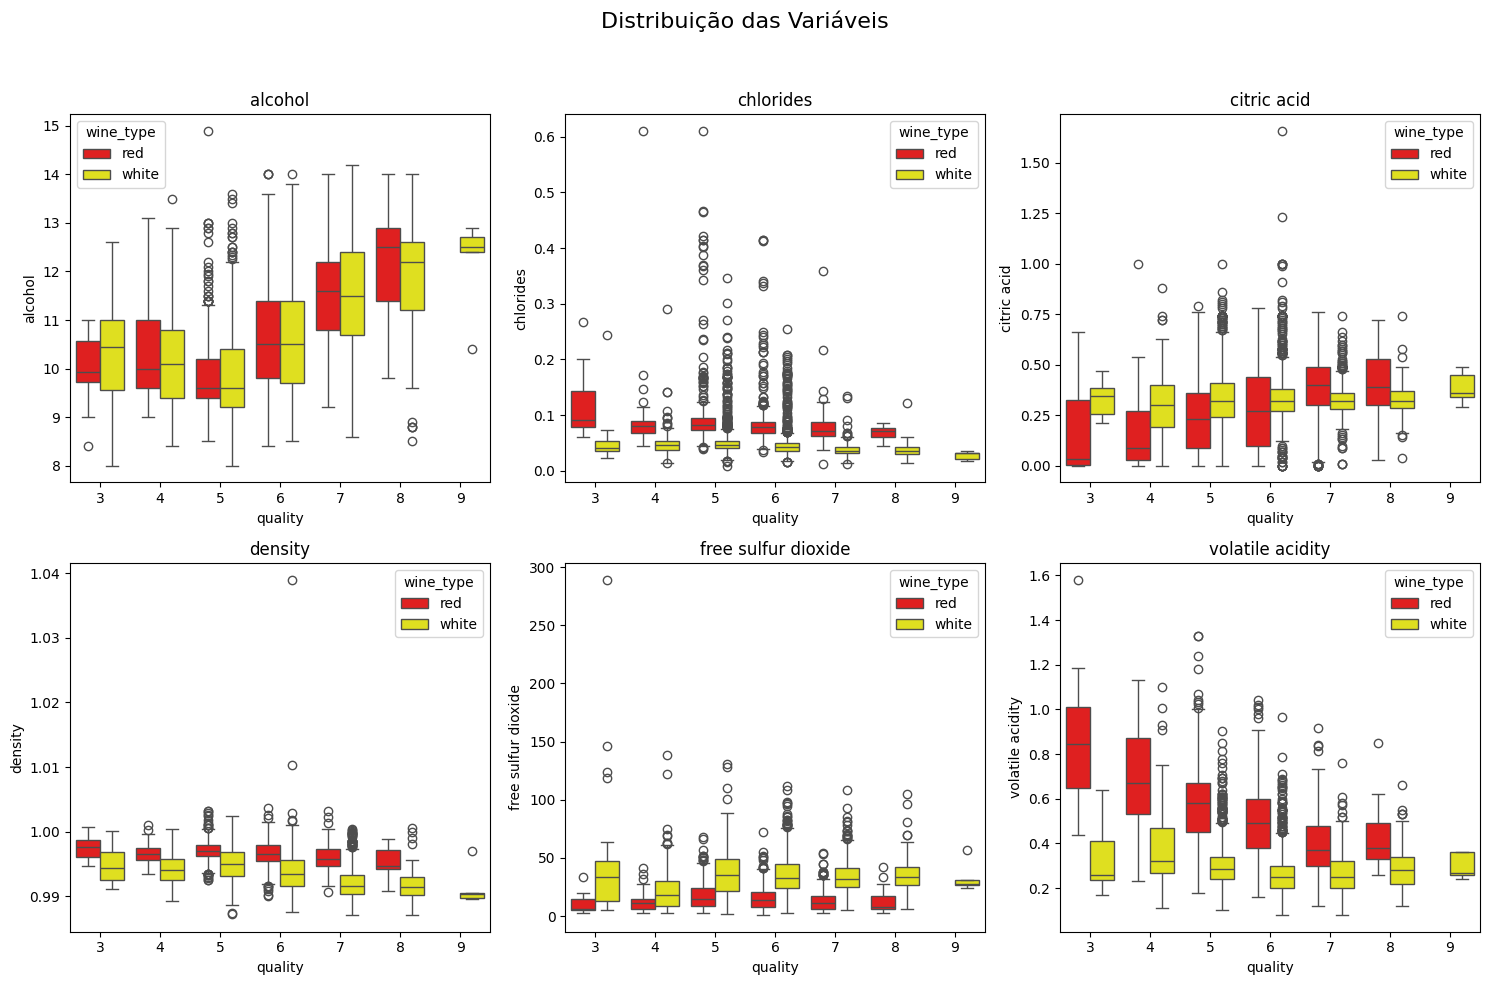

In [25]:
num_vars = len(best_corr_columns)

cols = 3
rows = math.ceil(num_vars / cols)

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 10))
fig.suptitle("Distribuição das Variáveis", fontsize=16)

for i, col in enumerate(best_corr_columns):
    ax = axes[i // cols, i % cols]
    sns.boxplot(
        x=wine_quality["quality"],
        y=wine_quality[col],
        hue=wine_quality["wine_type"],
        ax=ax,
        palette={"red": "red", "white": "yellow"},
    )
    ax.set_title(col)

for j in range(i + 1, rows * cols):
    fig.delaxes(axes[j // cols, j % cols])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## Pré-processamento

> Etapa para limpar e manipular os dados para que fiquem da melhor forma possível na etapa de construção do modelo.

### Resgatando os dados originais

Conforme a documentação do scikit-learn, o recomendado é primeiro dividir os dados em treino e teste e somente DEPOIS aplicar as transformações nos dados.

Isso evita o [vazamento de dados](https://scikit-learn.org/stable/common_pitfalls.html#data-leakage), o mesmo serve para o uso de uma **Pipeline**.

Como não aplicamos nenhuma transformação comprometedora na etapa de EDA, decidimos mantê-las.

**Obs.:** remover os dados duplicados na pipeline acaba não sendo algo bom, pois ao ser aplicado em X_train, ele não replicaria a remoção para y_train, gerando um *ValueError*. Ou seja, a etapa de remoção de duplicatas precisa ser aplicada em **todo o dataset**, antes mesmo da divisão dos dados.

### Separando em treino e teste

Algo preocupante na separação entre treino e teste é o `wine_type`, pois ele é desbalanceado. Como dito anteriormente, por não ser nosso target, mas sim uma das features, isso acaba não sendo tão preocupante assim. Mesmo assim, optamos por colocar o *stratify* do `train_test_split` para manter a proporção de `wine_type` ao longo dos conjuntos de treino e teste.

Também, caso o modelo performe mal para apenas um dos tipos de vinho, podemos tentar aplicar técnicas mostradas em aula, como o **SMOTE**, para balanceá-lo.

In [26]:
wine_quality['wine_type'].value_counts(True)

wine_type
white    0.744549
red      0.255451
Name: proportion, dtype: float64

In [27]:
X = wine_quality.drop(columns=['quality'])
y = wine_quality['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=wine_quality['wine_type'])

print(f"""Treino: {X_train.shape[0]} linhas
Teste: {X_test.shape[0]} linhas\n""")

print(f"""Distribuição de 'wine_type' no treino:\n{X_train['wine_type'].value_counts(True)}\n
Distribuição de 'wine_type' no teste:\n{X_test['wine_type'].value_counts(True)}""")

Treino: 3724 linhas
Teste: 1596 linhas

Distribuição de 'wine_type' no treino:
wine_type
white    0.744629
red      0.255371
Name: proportion, dtype: float64

Distribuição de 'wine_type' no teste:
wine_type
white    0.744361
red      0.255639
Name: proportion, dtype: float64


### Criando a pipeline de pré-processamento

Conforme as análises feitas acima, optamos por seguir com algumas transformações nos dados:

1. Remoção de duplicatas - já aplicadas anteriormente
    - Dados duplicados podem atrapalhar o modelo, então removemos
2. Tratamento de `wine_type`
    - Modelos não entendem valores em texto, então convertemos `red` e `white` para números (também chamado de label encoding)
3. Aplicação do `StandardScaler()`
    - Os dados estão em escalas diferentes, então optamos por padronizá-los com o StandardScaler. Após testes nos modelos, é interessante testar outros métodos, como o MinMaxScaler
    - Não foi aplicado na coluna do target (`quality`) para não influenciar nos testes
    - Não foi aplicado na coluna `wine_type`, pois após a etapa **2** ela virou uma variável binária, não fazendo muito sentido padronizá-la

In [28]:
features_to_scale = wine_quality.drop(columns=["quality", "wine_type"]).columns

preprocessor = ColumnTransformer(
    transformers=[
        ("label_encoder", OneHotEncoder(drop="if_binary"), ["wine_type"]),
        ("scale_features", StandardScaler(), features_to_scale),
    ],
    remainder="passthrough",
)
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('label_encoder',
                                 OneHotEncoder(drop='if_binary'),
                                 ['wine_type']),
                                ('scale_features', StandardScaler(),
                                 Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object'))])

> A pipeline ainda não foi aplicada nos dados, pois ela somente vai ser aplicada na hora do *treino e teste*, junto com a pipeline dos modelos

## Treinando e testando o modelo

### Treino inicial - LinearRegression

Treino simples para ver como está o comportamento da pipeline ao inserir um modelo e testá-lo, que, nos próximos passos, será adaptado para um loop contendo vários modelos sendo testados ao mesmo tempo.

In [29]:
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regression', LinearRegression())
])
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('label_encoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['wine_type']),
                                                 ('scale_features',
                                                  StandardScaler(),
                                                  Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object'))])),
                ('regression', LinearRegression())])

In [30]:
y_pred = model.predict(X_test)
y_pred

array([6.24231752, 5.73445347, 6.01490217, ..., 5.02895651, 5.1830422 ,
       6.11435606])

Como os valores de `quality` são inteiros, aproximamos para o valor inteiro mais próximo utilizando `round` e conversão para **int**

In [31]:
int_y_pred = y_pred.round().astype(int)
int_y_pred

array([6, 6, 6, ..., 5, 5, 6])

In [32]:
pd.DataFrame({'Valor previsto': y_pred, 'Valor arredondado': int_y_pred, 'Valor real': y_test})

,Valor previsto,Valor arredondado,Valor real
5980,6.242318,6,6
5251,5.734453,6,6
1935,6.014902,6,6
3373,5.952794,6,6
2199,5.140998,5,6
...,...,...,...
915,6.403680,6,6
4452,6.286535,6,6
3252,5.028957,5,6
808,5.183042,5,5


In [33]:
accuracy = accuracy_score(y_test, int_y_pred)
precision = precision_score(y_test, int_y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, int_y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, int_y_pred, average='weighted', zero_division=0)
report = classification_report(y_test, int_y_pred, zero_division=0)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print("\nClassification Report:\n", report)

Accuracy: 0.55
Precision: 0.54
Recall: 0.55
F1-score: 0.51

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         8
           4       1.00      0.05      0.10        59
           5       0.60      0.54      0.57       515
           6       0.53      0.74      0.62       720
           7       0.47      0.23      0.31       248
           8       0.00      0.00      0.00        45
           9       0.00      0.00      0.00         1

    accuracy                           0.55      1596
   macro avg       0.37      0.22      0.23      1596
weighted avg       0.54      0.55      0.51      1596



### Treino de múltiplos modelos - escolhendo o melhor

In [34]:
rs = 42

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=rs),
    'Random Forest': RandomForestRegressor(random_state=rs),
    'Gradient Boosting': GradientBoostingRegressor(random_state=rs),
    'XGBoost': XGBRegressor()
}

results = {}

for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        (name, model)
    ])
    
    pipeline.fit(X_train, y_train)
    
    y_pred = pipeline.predict(X_test)
    y_pred = np.round(y_pred).astype(int)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1': f1,
    }

In [35]:
for name, metrics in results.items():
    print(f"""{name}:
          Accuracy = {metrics['Accuracy']:.2f}, Precision = {metrics['Precision']:.2f},
          Recall = {metrics['Recall']:.2f}, F1 = {metrics['F1']:.2f}\n""")

Linear Regression:
          Accuracy = 0.55, Precision = 0.54,
          Recall = 0.55, F1 = 0.51

Decision Tree:
          Accuracy = 0.45, Precision = 0.46,
          Recall = 0.45, F1 = 0.45

Random Forest:
          Accuracy = 0.58, Precision = 0.55,
          Recall = 0.58, F1 = 0.55

Gradient Boosting:
          Accuracy = 0.57, Precision = 0.54,
          Recall = 0.57, F1 = 0.54

XGBoost:
          Accuracy = 0.55, Precision = 0.53,
          Recall = 0.55, F1 = 0.53



Os modelos acabaram não performando de uma forma tão boa, então optamos por pegar alguns deles e testar, agora seguindo com um ajuste nos hiperparâmetros.

### Ajustando hiperparâmetros e testando novamente os melhores modelos

In [36]:
param_grids = {
    'Random Forest': {
        'model__n_estimators': [100, 200, 300],
        'model__max_depth': [None, 10, 20, 30],
        'model__min_samples_split': [2, 5, 10],
        'model__min_samples_leaf': [1, 2, 4],
        'model__max_features': [None, 'sqrt', 'log2'],
        'model__bootstrap': [True, False]
    },
    'Gradient Boosting': {
        'model__n_estimators': [100, 200, 300],
        'model__learning_rate': [0.01, 0.1, 0.05],
        'model__max_depth': [3, 5, 10],
        'model__min_samples_split': [2, 5, 10],
        'model__min_samples_leaf': [1, 2, 4],
        'model__subsample': [0.8, 1.0]
    },
    'XGBoost': {
        'model__n_estimators': [100, 200, 300],
        'model__learning_rate': [0.01, 0.1, 0.05],
        'model__max_depth': [3, 5, 10],
        'model__subsample': [0.8, 1.0],
        'model__colsample_bytree': [0.8, 1.0],
        'model__gamma': [0, 0.1, 0.2]
    }
}

best_models = {}

for name, model in {'Random Forest': RandomForestRegressor(random_state=rs),
                    'Gradient Boosting': GradientBoostingRegressor(random_state=rs),
                    'XGBoost': XGBRegressor(random_state=rs)}.items():
    
    print(f'Randomized Search of {name}')
    
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    random_search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=param_grids[name],
        n_iter=20,
        scoring='neg_mean_squared_error',
        cv=5,
        n_jobs=-1,
        random_state=rs,
        verbose=2
    )
    
    random_search.fit(X_train, y_train)
    
    best_models[name] = {
        'best_estimator': random_search.best_estimator_,
        'best_params': random_search.best_params_,
        'best_score': -random_search.best_score_
    }

for name, result in best_models.items():
    print(f"{name} - Best Params: {result['best_params']}")
    print(f"{name} - Best CV Score (MSE): {result['best_score']}")

Randomized Search of Random Forest
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[CV] END model__bootstrap=True, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200; total time=   1.2s
[CV] END model__bootstrap=True, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200; total time=   1.2s
[CV] END model__bootstrap=True, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200; total time=   1.2s
[CV] END model__bootstrap=True, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200; total time=   1.2s
[CV] END model__bootstrap=True, model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=200; total time=   1.4s
[CV] END model__bootstrap=True, model__max_depth=None, model__max_features=log2, model__min_samples_leaf=4, mo

In [37]:
for name, result in best_models.items():
    best_model = result['best_estimator']
    
    y_pred = best_model.predict(X_test)
    y_pred = np.round(y_pred).astype(int)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    print(f"{name} - Best Params: {result['best_params']}")
    print(f"{name} - Best CV Score (MSE): {result['best_score']}")
    print(f"{name} - Accuracy: {accuracy}")
    print(f"{name} - Precision: {precision}")
    print(f"{name} - Recall: {recall}")
    print(f"{name} - F1 Score: {f1}")
    print("="*50)

Random Forest - Best Params: {'model__n_estimators': 200, 'model__min_samples_split': 5, 'model__min_samples_leaf': 1, 'model__max_features': 'log2', 'model__max_depth': 20, 'model__bootstrap': True}
Random Forest - Best CV Score (MSE): 0.47818398733686973
Random Forest - Accuracy: 0.5921052631578947
Random Forest - Precision: 0.546683783790113
Random Forest - Recall: 0.5921052631578947
Random Forest - F1 Score: 0.5625523541473054
Gradient Boosting - Best Params: {'model__subsample': 0.8, 'model__n_estimators': 100, 'model__min_samples_split': 5, 'model__min_samples_leaf': 4, 'model__max_depth': 5, 'model__learning_rate': 0.05}
Gradient Boosting - Best CV Score (MSE): 0.4926752314910753
Gradient Boosting - Accuracy: 0.5720551378446115
Gradient Boosting - Precision: 0.5426051775330986
Gradient Boosting - Recall: 0.5720551378446115
Gradient Boosting - F1 Score: 0.5464468215637577
XGBoost - Best Params: {'model__subsample': 0.8, 'model__n_estimators': 300, 'model__max_depth': 10, 'model__

De acordo com o [artigo que documentou os dados](https://repositorium.sdum.uminho.pt/bitstream/1822/10029/1/wine5.pdf), uma boa forma de ver se a nota dos vinhos está dentro do esperado (na realidade), acaba sendo pegar o resultado arredondado (não transformado em inteiro) e aplicar uma **tolerância** de até 1

In [38]:
def accuracy_with_tolerance(y_true, y_pred, tolerance=1):
    """
    Calcula a acurácia considerando uma tolerância definida.
    
    Parameters:
    - y_true: Valores reais (target).
    - y_pred: Valores previstos pelo modelo.
    - tolerance: Valor da tolerância para a comparação.

    Retorna:
    - Acurácia calculada com a tolerância.
    """
    
    correct = np.abs(y_true - y_pred) <= tolerance
    return np.mean(correct)

Testando com todos os modelos em sua forma padrão + Tolerância

In [39]:
rs = 42

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=rs),
    'Random Forest': RandomForestRegressor(random_state=rs),
    'Gradient Boosting': GradientBoostingRegressor(random_state=rs),
    'XGBoost': XGBRegressor()
}

results = {}

for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        (name, model)
    ])
    
    pipeline.fit(X_train, y_train)
    
    y_pred = pipeline.predict(X_test)
    y_pred_rounded = np.round(y_pred)
    y_pred_int = np.round(y_pred).astype(int)
    
    accuracy = accuracy_score(y_test, y_pred_int)
    accuracy_tolerance_025 = accuracy_with_tolerance(y_test, y_pred_rounded, tolerance=0.25)
    accuracy_tolerance_05 = accuracy_with_tolerance(y_test, y_pred_rounded, tolerance=0.5)
    accuracy_tolerance_075 = accuracy_with_tolerance(y_test, y_pred_rounded, tolerance=0.75)
    accuracy_tolerance_1 = accuracy_with_tolerance(y_test, y_pred_rounded, tolerance=1)
    
    print(f"{name} - Accuracy (standard): {accuracy}")
    print(f"{name} - Accuracy with T=0.25: {accuracy_tolerance_025}")
    print(f"{name} - Accuracy with T=0.5: {accuracy_tolerance_05}")
    print(f"{name} - Accuracy with T=0.75: {accuracy_tolerance_05}")
    print(f"{name} - Accuracy with T=1: {accuracy_tolerance_1}")
    print("="*50)

Linear Regression - Accuracy (standard): 0.5469924812030075
Linear Regression - Accuracy with T=0.25: 0.5469924812030075
Linear Regression - Accuracy with T=0.5: 0.5469924812030075
Linear Regression - Accuracy with T=0.75: 0.5469924812030075
Linear Regression - Accuracy with T=1: 0.949874686716792
Decision Tree - Accuracy (standard): 0.45050125313283207
Decision Tree - Accuracy with T=0.25: 0.45050125313283207
Decision Tree - Accuracy with T=0.5: 0.45050125313283207
Decision Tree - Accuracy with T=0.75: 0.45050125313283207
Decision Tree - Accuracy with T=1: 0.8916040100250626
Random Forest - Accuracy (standard): 0.5770676691729323
Random Forest - Accuracy with T=0.25: 0.5770676691729323
Random Forest - Accuracy with T=0.5: 0.5770676691729323
Random Forest - Accuracy with T=0.75: 0.5770676691729323
Random Forest - Accuracy with T=1: 0.9624060150375939
Gradient Boosting - Accuracy (standard): 0.568295739348371
Gradient Boosting - Accuracy with T=0.25: 0.568295739348371
Gradient Boosting 

Testando com os melhores modelos após hiperparâmetros + Tolerância

In [40]:
for name, result in best_models.items():
    best_model = result['best_estimator']
    
    y_pred = best_model.predict(X_test)
        
    y_pred_rounded = np.round(y_pred)
    y_pred_int = np.round(y_pred).astype(int)
    
    accuracy = accuracy_score(y_test, y_pred_int)
    precision = precision_score(y_test, y_pred_int, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred_int, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred_int, average='weighted', zero_division=0)
    
    accuracy_tolerance_025 = accuracy_with_tolerance(y_test, y_pred_rounded, tolerance=0.25)
    accuracy_tolerance_05 = accuracy_with_tolerance(y_test, y_pred_rounded, tolerance=0.5)
    accuracy_tolerance_075 = accuracy_with_tolerance(y_test, y_pred_rounded, tolerance=0.75)
    accuracy_tolerance_1 = accuracy_with_tolerance(y_test, y_pred_rounded, tolerance=1)

    print(f"{name} - Accuracy (standard): {accuracy}")
    print(f"{name} - Accuracy with T=0.25: {accuracy_tolerance_025}")
    print(f"{name} - Accuracy with T=0.5: {accuracy_tolerance_05}")
    print(f"{name} - Accuracy with T=0.75: {accuracy_tolerance_05}")
    print(f"{name} - Accuracy with T=1: {accuracy_tolerance_1}")
    print("="*50)

Random Forest - Accuracy (standard): 0.5921052631578947
Random Forest - Accuracy with T=0.25: 0.5921052631578947
Random Forest - Accuracy with T=0.5: 0.5921052631578947
Random Forest - Accuracy with T=0.75: 0.5921052631578947
Random Forest - Accuracy with T=1: 0.9642857142857143
Gradient Boosting - Accuracy (standard): 0.5720551378446115
Gradient Boosting - Accuracy with T=0.25: 0.5720551378446115
Gradient Boosting - Accuracy with T=0.5: 0.5720551378446115
Gradient Boosting - Accuracy with T=0.75: 0.5720551378446115
Gradient Boosting - Accuracy with T=1: 0.9642857142857143
XGBoost - Accuracy (standard): 0.5852130325814536
XGBoost - Accuracy with T=0.25: 0.5852130325814536
XGBoost - Accuracy with T=0.5: 0.5852130325814536
XGBoost - Accuracy with T=0.75: 0.5852130325814536
XGBoost - Accuracy with T=1: 0.9642857142857143


# Conclusão e próximos passos

- O modelo, por mais que tenha performado de uma forma não tão boa, ele começou a atingir melhores resultados ao aplicarmos as tolerâncias, subindo muito nos casos onde `T = 1` e mantendo uma semelhança na maioria dos modelos onde `T < 1`. Isso mostra que ainda existe muita melhoria a ser feita, já que apenas está atingindo um bom resultado com uma alta tolerância

- O RandomForest performou melhor após a sua nova configuração com hiperparâmetros, subindo sua acurácia padrão de 0.577 para 0.592

- Uma melhor investigação e tratamento sobre as features provavelmente ajudaria o resultado a subir mais ainda

- O modelo do artigo divide os dados entre red wine e white wine para os modelos, nós acabamos não dividindo, talvez deixando-o com um treinamento mais complexo e mais difícil de ser definido, já que as características químicas de diferentes tipos de vinho influenciam em sua nota.

- Comparando os resultados do nosso melhor modelo (RandomForest) com o melhor modelo obtido no artigo (SVM), nosso modelo performou de forma pior para T=0.5, mas ainda ficou melhor para T=0.25 e T=1, conforme podemos ver abaixo:

![Article Scores](assets/notebooks/article_scores.png)


Próximos passos:

- Melhoria nas features
    > Por conta do tempo de projeto, acabamos não desenvolvendo tanto as features, tendo um foco maior nos modelos. Trabalhar melhor em cima das features poderia nos ajudar a ter melhores valores previstos
- Monitoramento dos dados com MLFlow
- Deploy do modelo e utilização de alguma API em cima dos dados